# Data Science and Machine Learning Internship Program 

# Assignment-7

# Problem Statement1: Build a text classification RNN ( RecurrentNeural Network) model using IMDB dataset.Import theIMDBdataset using tensorflow_datasets and perform the following tasks.

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow-datasets

Note: you may need to restart the kernel to use updated packages.


# Import the required libraries

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

# Task 2. Shuffle the data for training and create batches of text and label pairs

In [4]:
# Load the IMDB dataset
(ds_train, ds_test), ds_info = tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True, with_info=True)

# Shuffle and batch the training data
BUFFER_SIZE = 10000
BATCH_SIZE = 64

ds_train = ds_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


# Task 3. Encode the text data

In [5]:
# Define the TextVectorization layer
VOCAB_SIZE = 10000
SEQUENCE_LENGTH = 100

vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH
)

# Adapt the TextVectorization layer to the training data
train_text = ds_train.map(lambda x, y: x)
vectorize_layer.adapt(train_text)


# Task 4. • Build a sequential model using tf.keras.Sequential function

In [6]:
# Build the RNN model
model = Sequential([
    vectorize_layer,
    Embedding(VOCAB_SIZE, 64, mask_zero=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(1)
])


# Task 5. Compile the model

In [7]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)


# Task 6. Train the model using train dataset

In [8]:
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

Epoch 1/10
391/391 [==============================] - 45s 104ms/step - loss: 0.6355 - accuracy: 0.5787 - val_loss: 0.5073 - val_accuracy: 0.7439
Epoch 2/10
391/391 [==============================] - 41s 104ms/step - loss: 0.4088 - accuracy: 0.8102 - val_loss: 0.4296 - val_accuracy: 0.7986
Epoch 3/10
391/391 [==============================] - 41s 105ms/step - loss: 0.3152 - accuracy: 0.8650 - val_loss: 0.4547 - val_accuracy: 0.7888
Epoch 4/10
391/391 [==============================] - 40s 102ms/step - loss: 0.2715 - accuracy: 0.8896 - val_loss: 0.4321 - val_accuracy: 0.7956
Epoch 5/10
391/391 [==============================] - 49s 126ms/step - loss: 0.2353 - accuracy: 0.9076 - val_loss: 0.4794 - val_accuracy: 0.7984
Epoch 6/10
391/391 [==============================] - 44s 113ms/step - loss: 0.2106 - accuracy: 0.9209 - val_loss: 0.4880 - val_accuracy: 0.7948
Epoch 7/10
391/391 [==============================] - 46s 117ms/step - loss: 0.1909 - accuracy: 0.9291 - val_loss: 0.5316 - val_ac

# Task 7. Test the data using tset dataset 

In [9]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(ds_test)
print(f'Test Accuracy: {test_acc}')

391/391 [==============================] - 12s 30ms/step - loss: 0.5914 - accuracy: 0.7805
Test Accuracy: 0.7805200219154358


# Evaluate the model by passing a sentence

Note: If the prediction is >= 0.0, it is positive else it is negative.

In [10]:
# Function to predict the sentiment of a given text
def predict_sentiment(text):
    # Preprocess the text
    text_array = tf.constant([text])
    # Predict the sentiment
    prediction = model.predict(text_array)[0][0]
    # Print the result
    if prediction >= 0.0:
        return "Positive Review"
    else:
        return "Negative Review"

# Example usage
sample_text = ""
result = predict_sentiment(sample_text)
print(f"Review: {sample_text}\nPrediction: {result}")

sample_text2 = "I can't say this is the worst movie ever made, but personally I think of it that way because that it was original release in theatres"
result2 = predict_sentiment(sample_text2)
print(f"Review: {sample_text2}\nPrediction: {result2}")


1/1 [==============================] - 2s 2s/step
Review: 
Prediction: Positive Review
1/1 [==============================] - 0s 27ms/step
Review: I can't say this is the worst movie ever made, but personally I think of it that way because that it was original release in theatres
Prediction: Negative Review


# Problem Statement 2:

Sumanth wants to build an flowers image classification CNN model which can take a flower
image as input and prints the name of flower.

## Dataset Description: 
The dataset consist of 3,700 photos of flowers. The dataset contains five
sub-directories, one per class:



# Import all the required libraries

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import os
import pathlib
import numpy as np
import tarfile

# Download the flowers data from URL:
'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_phot
os.tgz' using the Keras; and analyzing the images present in the dataset visualization

In [12]:
# Download the dataset
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file(origin=dataset_url, untar=False)

# Extract the dataset
tar = tarfile.open(data_dir, "r:gz")
tar.extractall(path=os.path.dirname(data_dir))
tar.close()

# Get the directory path
data_dir = os.path.join(os.path.dirname(data_dir), 'flower_photos')

# Convert to pathlib Path object
data_dir = pathlib.Path(data_dir)

# Visualize the dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'Total images: {image_count}')



Total images: 3671


# Task 3. Prepare the data by specifying the image resolution and batch size. Also, Splitting the dataset into training and validation datasets in 80:20 ratio


In [13]:
# Define parameters
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# Create datasets
train_dataset = image_dataset_from_directory(data_dir,
                                             validation_split=0.2,
                                             subset="training",
                                             seed=123,
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE)

validation_dataset = image_dataset_from_directory(data_dir,
                                                  validation_split=0.2,
                                                  subset="validation",
                                                  seed=123,
                                                  image_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE)

# Get class names
class_names = train_dataset.class_names



Found 3671 files belonging to 5 classes.
Using 2937 files for training.
Found 3671 files belonging to 5 classes.
Using 734 files for validation.


# Task 4. Plot a sample image attributed to each class name present in the original dataset.


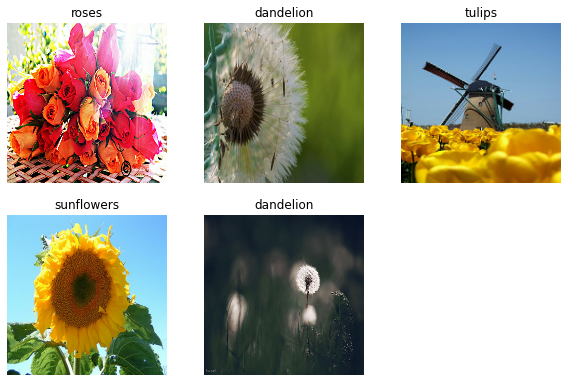

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


# Task 5. Autotune the data using cache().shuffle().prefetch() function; Also, normalize the data by deviding it with a number

In [15]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))


# Task 6. Build a sequential CNN model

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)


# Task 7. Compile the model and print model summary

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(160, 160, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])


# Task 8. Train and validate the model and plot the validation results using a line plot

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 79, 79, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)      

# Task 9. Feed the system with an image of a flower and print the prediction along with the accuracy

In [19]:
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)


Epoch 1/10
92/92 [==============================] - 70s 644ms/step - loss: 1.6070 - accuracy: 0.2349 - val_loss: 1.6024 - val_accuracy: 0.2398
Epoch 2/10
92/92 [==============================] - 53s 580ms/step - loss: 1.6017 - accuracy: 0.2458 - val_loss: 1.6036 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 53s 581ms/step - loss: 1.6021 - accuracy: 0.2458 - val_loss: 1.6023 - val_accuracy: 0.2398
Epoch 4/10
92/92 [==============================] - 54s 590ms/step - loss: 1.6012 - accuracy: 0.2458 - val_loss: 1.6021 - val_accuracy: 0.2398
Epoch 5/10
92/92 [==============================] - 56s 606ms/step - loss: 1.6009 - accuracy: 0.2458 - val_loss: 1.6024 - val_accuracy: 0.2398
Epoch 6/10
92/92 [==============================] - 55s 602ms/step - loss: 1.6008 - accuracy: 0.2458 - val_loss: 1.6023 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 61s 663ms/step - loss: 1.6005 - accuracy: 0.2458 - val_loss: 1.6037 - val_accuracy: 0.2398

# Task 10: Plot the Validation Results

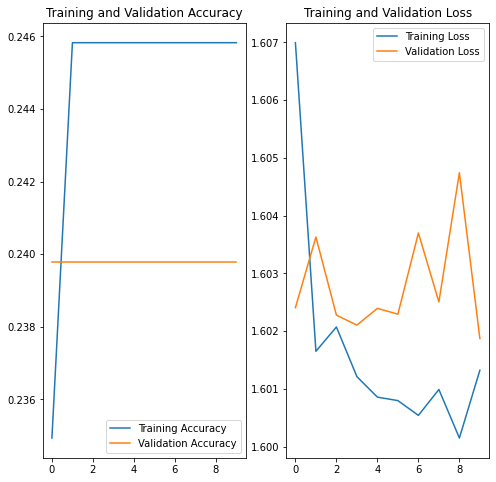

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Task 11: Make Predictions with a Custom Image

In [21]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(160, 160))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    img_array = normalization_layer(img_array) # Normalize the image
    return img_array

# Load an image to predict
image_path = '751941983_58e1ae3957_m.jpg'
img_array = load_and_preprocess_image(image_path)

# Predict the class
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0]) * 100
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence")


FileNotFoundError: [Errno 2] No such file or directory: '751941983_58e1ae3957_m.jpg'

In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(160, 160))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    img_array = normalization_layer(img_array) # Normalize the image
    return img_array

# Load an image to predict
image_path = '112334842_3ecf7585dd.jpg'
img_array = load_and_preprocess_image(image_path)

# Predict the class
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0]) * 100
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence")

# Data Augumentation

In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
])

# Apply data augmentation to the training dataset
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y))


# Improved Model Architecture

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(160, 160, 3)),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])


In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(160, 160))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    img_array = normalization_layer(img_array) # Normalize the image
    return img_array

# Load an image to predict
image_path = '353897245_5453f35a8e.jpg'
img_array = load_and_preprocess_image(image_path)

# Predict the class
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0]) * 100
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence")

In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(160, 160))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    img_array = normalization_layer(img_array) # Normalize the image
    return img_array

# Load an image to predict
image_path = '14073784469_ffb12f3387_n.jpg'
img_array = load_and_preprocess_image(image_path)

# Predict the class
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0]) * 100
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence")

# Training the model again since it is giving false predications 

# Enhancing Accuracy

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import tarfile

In [ ]:
# Download and extract the dataset
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file(origin=dataset_url, untar=False)
tar = tarfile.open(data_dir, "r:gz")
tar.extractall(path=os.path.dirname(data_dir))
tar.close()
data_dir = os.path.join(os.path.dirname(data_dir), 'flower_photos')
data_dir = pathlib.Path(data_dir)

In [ ]:
# Prepare the data
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(data_dir,
                                             validation_split=0.2,
                                             subset="training",
                                             seed=123,
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE)

validation_dataset = image_dataset_from_directory(data_dir,
                                                  validation_split=0.2,
                                                  subset="validation",
                                                  seed=123,
                                                  image_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE)

class_names = train_dataset.class_names


In [ ]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

In [ ]:
# Normalize the data
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Load the pre-trained MobileNetV2 model and fine-tune it
base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [ ]:
# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
# Compile the model
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

model.summary()


In [ ]:
# Train the model
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

In [ ]:
# Plot the training and validation results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(160, 160))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    img_array = normalization_layer(img_array)  # Normalize the image
    return img_array

# Load an image to predict
image_path = '22873310415_3a5674ec10_m.jpg'
img_array = load_and_preprocess_image(image_path)

# Predict the class
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0]) * 100
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence")


In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(160, 160))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    img_array = normalization_layer(img_array)  # Normalize the image
    return img_array

# Load an image to predict
image_path = '44079668_34dfee3da1_n.jpg'
img_array = load_and_preprocess_image(image_path)

# Predict the class
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0]) * 100
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence")

In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(160, 160))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    img_array = normalization_layer(img_array)  # Normalize the image
    return img_array

# Load an image to predict
image_path = '2059172936_032ffc12aa.jpg'
img_array = load_and_preprocess_image(image_path)

# Predict the class
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0]) * 100
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence")

In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(160, 160))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    img_array = normalization_layer(img_array)  # Normalize the image
    return img_array

# Load an image to predict
image_path = '2489638840_72ff3ee527_n.jpg'
img_array = load_and_preprocess_image(image_path)

# Predict the class
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0]) * 100
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence")

In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(160, 160))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    img_array = normalization_layer(img_array)  # Normalize the image
    return img_array

# Load an image to predict
image_path = '136011860_44ca0b2835_n.jpg'
img_array = load_and_preprocess_image(image_path)

# Predict the class
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0]) * 100
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence")